In [1]:
import pandas as pd
import PIL
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re
import pickle
import random

In [2]:
# load data 
df_train = pickle.load(open('data/df_train.pickle', 'rb'))

In [3]:
random.seed(10)
df_train = df_train.sample(frac=1)#.reset_index()

unique_pictures = df_train['filename'].unique()
#sample_pictures = unique_pictures[:50]
sample_pictures_50_top = unique_pictures

In [4]:

def show_annotations(sample_img):

    """Display all bounding boxes of annotated data."""

    figsize = sample_img.iloc[0]['width'] / float(100), sample_img.iloc[0]['height']/ float(100)
    fig, ax = plt.subplots(figsize=figsize)

    ax.imshow(sample_img.iloc[0]['image'])

    for i in range(sample_img.shape[0]):

        rect = patches.Rectangle((sample_img.iloc[i]['xmin'], sample_img.iloc[i]['ymin']), 
                                sample_img.iloc[i]['xmax']-sample_img.iloc[i]['xmin'], 
                                sample_img.iloc[i]['ymax']-sample_img.iloc[i]['ymin'],
                                edgecolor='red',
                                facecolor='none',
                                linewidth=3,
                                )

        ax.add_patch(rect)
    plt.show()

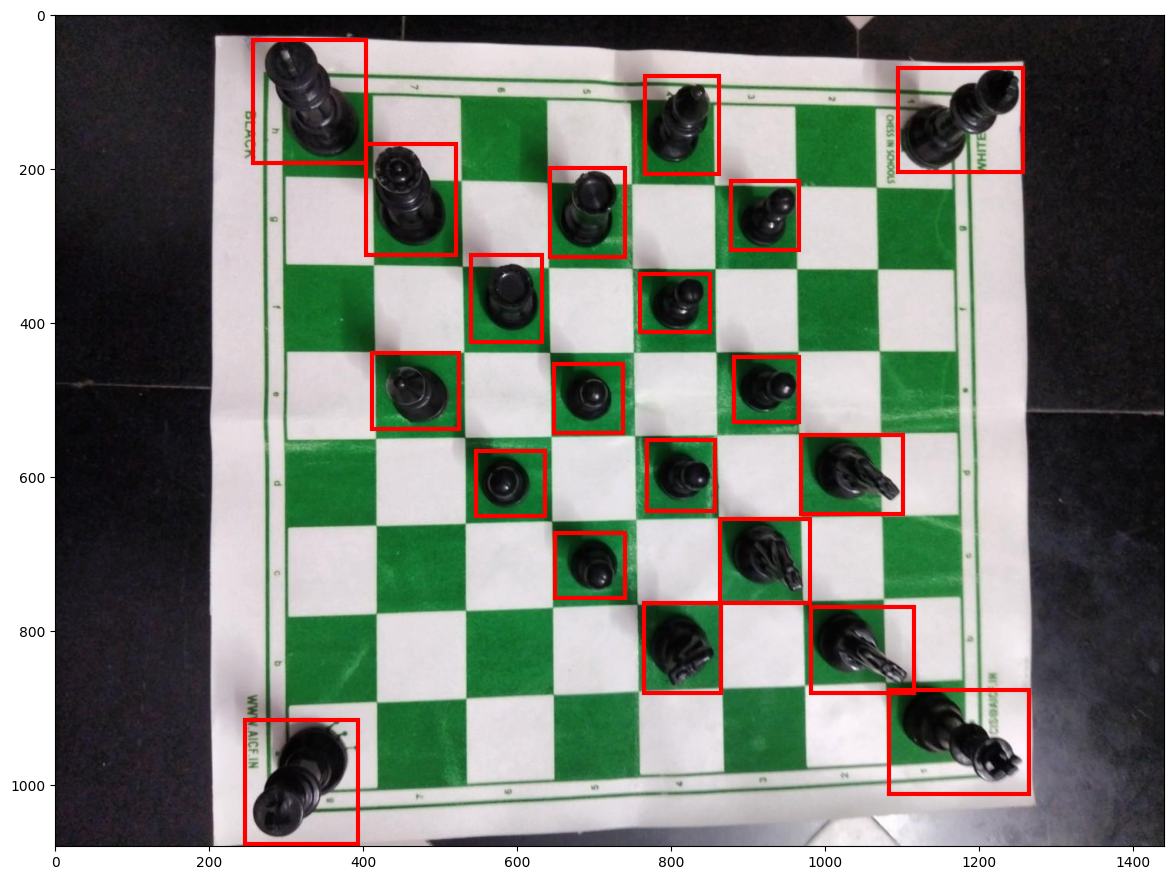

In [5]:
import time
from IPython.display import clear_output

filename = []
correct_annotation = []
count=0

for i in range(len(sample_pictures_50_top)):
    
    sample = df_train[df_train['filename'] == sample_pictures_50_top[i]]
    filename.append(sample.iloc[0]['filename'])
    show_annotations(sample)
    time.sleep(0.5)

    inp_anot = input('Annotation correct? (y/n)' )
    if inp_anot == 'q':
        break
    else:
        correct_annotation.append(inp_anot)
    count+=1
    clear_output(wait=True)

In [6]:
df_anot = pd.DataFrame()
df_anot['filename'] = filename[:-1]
df_anot['correct_anot'] = correct_annotation
#df_anot

In [7]:
#df_anot.to_csv(f'data/checked_annot/top_{count}_anot.csv')